# Feature Importance and Strategy Design

This project is aimed to analyse the instrument and then design strategy according to the importance of the strategy.



In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
%matplotlib inline
from nsepy import get_history
from datetime import date

In [33]:
#df=pd.read_csv('nifty_data.csv',index_col='datetime',parse_dates=True)

df=pd.read_csv('3131.csv',index_col='datetime',parse_dates=True)

#df=pd.read_csv('622_INFOSYS.csv',index_col='datetime',parse_dates=True)
#df=df['2007':'2008']
#df=pd.read_csv('995_PAGE_IND.csv',index_col='datetime',parse_dates=True)
#df=df[len(df)-100:len(df)]
#df=df['2018']
#df=pd.read_csv('995_PAGE_IND.csv',index_col='datetime',parse_dates=True)
#del df['Last']
#del df['Last']
#del df['Volume']
#del df['Turnover (Lacs)']
#df=df['2007':]


O=df['open']
H=df['high']
L=df['low']
C=df['close']

#df.head()
print(len(df))


3448


In [34]:
df['ADX'] = ta.ADX(O, L, C, timeperiod=14)
df['RSI'] = ta.RSI( C, timeperiod=14)


df['SMA_10']=C.rolling(10).mean()
df['SMA_21']=C.rolling(21).mean()
df['SMA_3']=C.rolling(3).mean()
df['SMA_50']=C.rolling(50).mean()


#df['exp_10'] = C.ewm(span=10, adjust=False).mean()
df['exp_21'] = C.ewm(span=21, adjust=False).mean()


#Average True Range
df['ATR']=ta.ATR(H,L,C,timeperiod=14)




#Commodiy Channel Index 
df['CCI']=ta.CCI(H,L,C,timeperiod=14)


#Momentum
df['MOM']=ta.MOM(C,timeperiod=10)


#ROC
df['ROC']=ta.ROC(C,timeperiod=10)


#ROCP
df['ROCR']=ta.ROCP(C,timeperiod=10)



#Williams %R

df['Williams %R']=ta.WILLR(H,L,C,timeperiod=14)


#Stochastic %K


df['slowk'], df['slowd'] = ta.STOCH(H, L, C, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [35]:
#drop all the nan values
df=df.dropna()
df.head()


#For Converting into a Binary Classification Problem we will assign them into 1 or 0 values
#df['pred_price']=np.where(df['Close'].shift(-1)>df['Close'],1,0)

df['pred_price']=df['close'].shift(1)
df=df.dropna()
len(df)

3398

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

y=df['pred_price']
X=df.drop(columns=['pred_price'])
print(len(X))
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(len(X_train),len(X_test))

3398
               open     high      low    close  volume        ADX        RSI  \
datetime                                                                       
2006-03-17  4717.70  4744.39  4686.14  4701.14     0.0  14.403197  61.009812   
2006-03-20  4707.00  4730.70  4697.20  4707.95     0.0  15.441767  61.553072   
2006-03-21  4711.39  4744.25  4644.60  4661.85     0.0  15.602896  55.877283   
2006-03-22  4666.70  4666.70  4592.70  4607.45     0.0  15.039500  50.016298   
2006-03-23  4621.95  4664.00  4594.85  4626.00     0.0  14.516346  51.870168   

              SMA_10       SMA_21        SMA_3     SMA_50       exp_21  \
datetime                                                                 
2006-03-17  4644.494  4574.958571  4699.880000  4570.1944  4607.807315   
2006-03-20  4652.889  4582.570476  4706.530000  4572.3484  4616.911195   
2006-03-21  4655.629  4592.549048  4690.313333  4571.7026  4620.996541   
2006-03-22  4654.194  4600.080000  4659.083333  4568.6426  4619.

38.18268269897999
[ 4.48407171e-01  1.57117003e-02  4.61733454e-02 -3.71186412e-01
  2.33146835e-15 -1.42328549e-01 -2.92392569e-01 -1.13642043e-01
 -3.96154983e-02  9.80516349e-01 -5.64531617e-03  3.90558069e-02
 -2.10385823e-02  1.01768613e-03 -2.58094225e-02  1.01904086e+00
  1.01904086e-02  2.74949758e-02  1.96076751e+00 -2.18700570e+00]


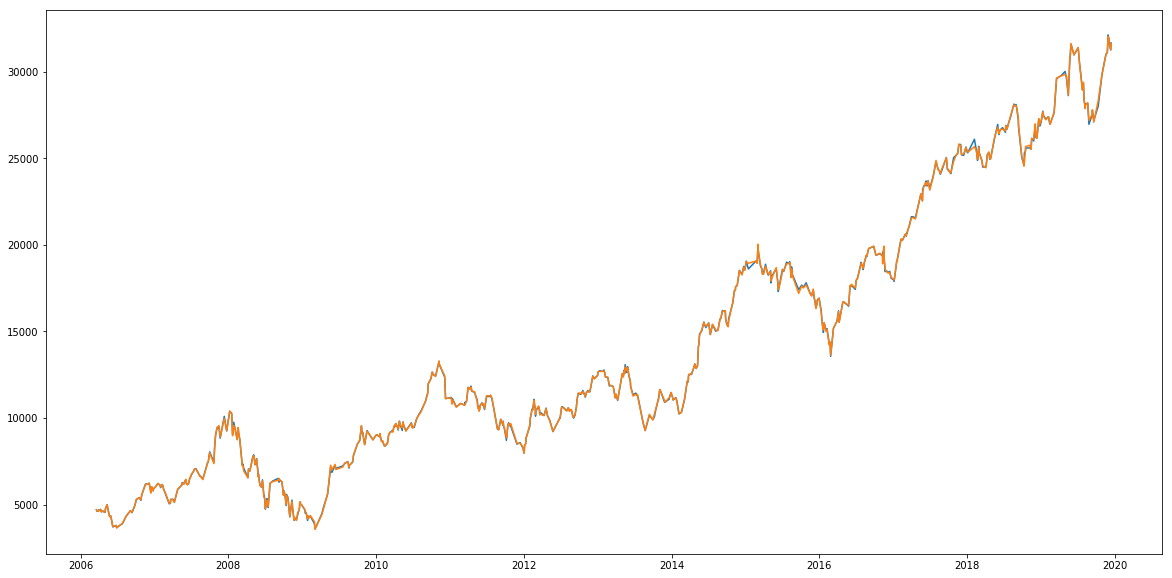

In [37]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)


y_pred = regressor.predict(X_test)

#plt.figure(figsize=(20,20))
#plt.plot(list(y_pred))
#plt.plot(list(y_test))





df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df1.sort_index()

df1
plt.figure(figsize=(20,10))
plt.plot(df1['Actual'])
plt.plot(df1['Predicted'])



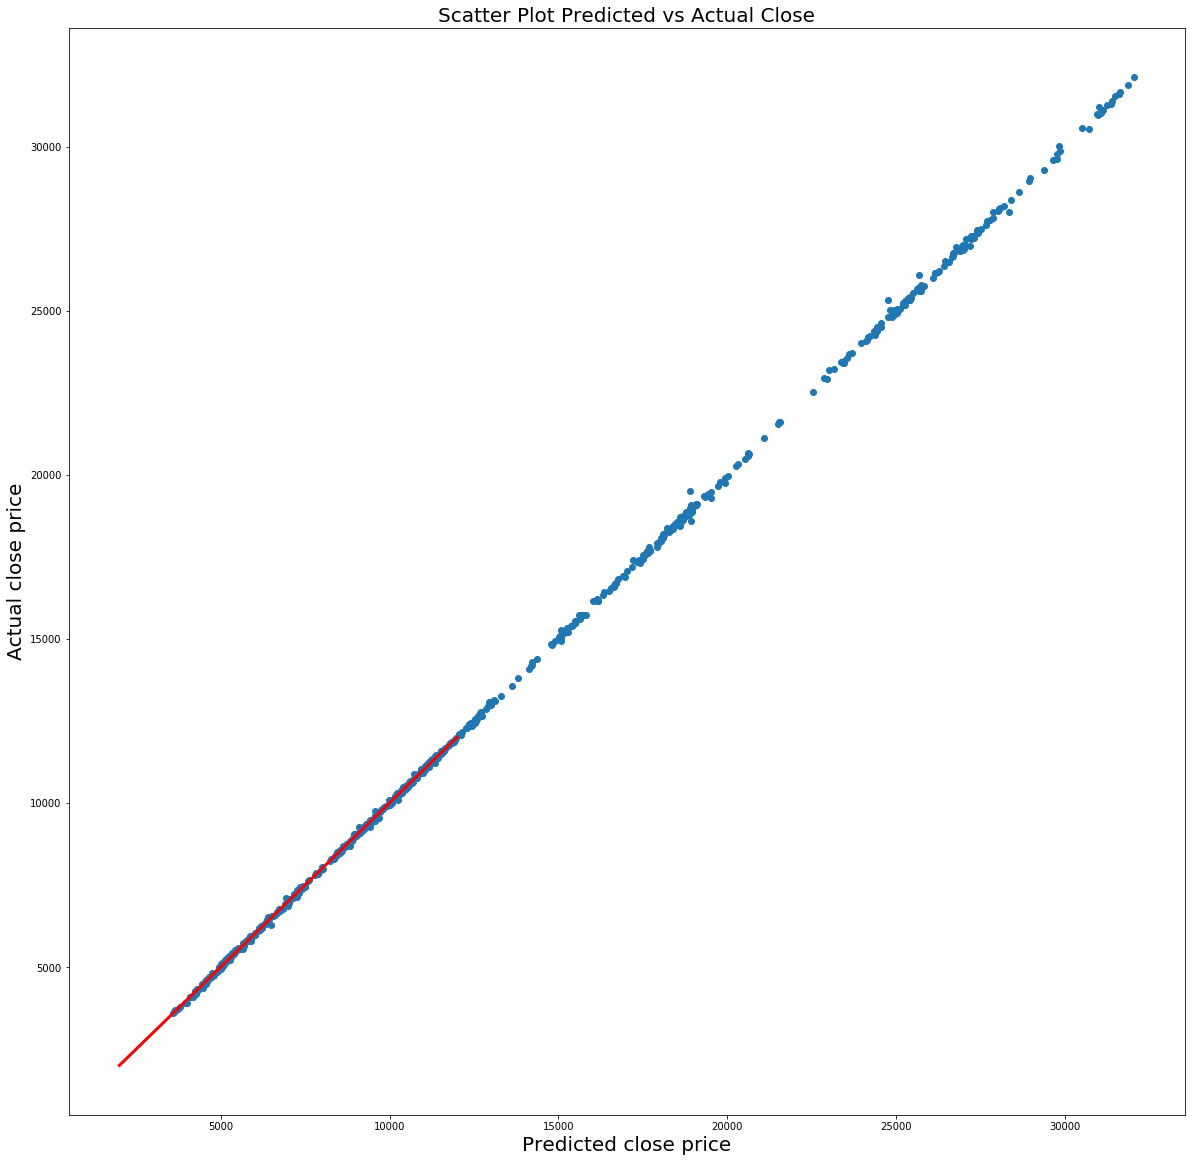

In [38]:
#(len(X_test))
plt.figure(figsize=(20,20))
plt.scatter(y_pred, y_test)
#plt.plot(y_pred, y_test, color='red', linewidth=2)

x = np.linspace(2000,12000,1000)
y = x
plt.plot(x, y, '-r',linewidth=3) #label='y=2x+1')


plt.xlabel('Predicted close price',fontsize=20)
plt.ylabel('Actual close price',fontsize=20)
plt.title('Scatter Plot Predicted vs Actual Close',fontsize=20)
plt.show()


In [39]:
import sklearn
#sklearn.metrics.mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
sklearn.metrics.mean_squared_error(y_test, y_pred)

4884.949008707555

[4.48407171e-01 1.57117003e-02 4.61733454e-02 3.71186412e-01
 2.33146835e-15 1.42328549e-01 2.92392569e-01 1.13642043e-01
 3.96154983e-02 9.80516349e-01 5.64531617e-03 3.90558069e-02
 2.10385823e-02 1.01768613e-03 2.58094225e-02 1.01904086e+00
 1.01904086e-02 2.74949758e-02 1.96076751e+00 2.18700570e+00]


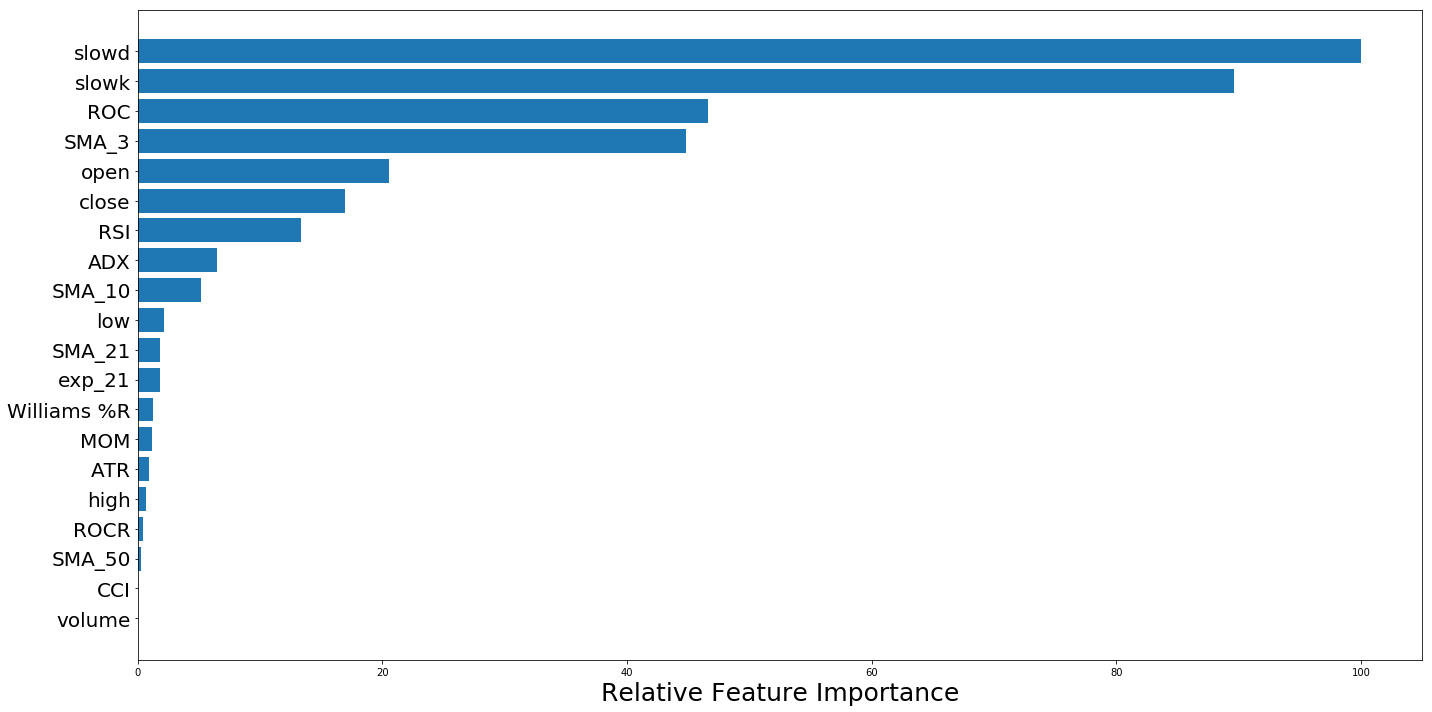

In [40]:
feature_importance=abs(regressor.coef_)
print(feature_importance)
feature_importance=100.0*((feature_importance)/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5

featfig=plt.figure(figsize=(20,10))
featax=featfig.add_subplot(1,1,1)
featax.barh(pos,feature_importance[sorted_idx],align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx],fontsize=20)
featax.set_xlabel('Relative Feature Importance',fontsize=25)

plt.tight_layout()
plt.show()

In [41]:
print(df.head())

               open     high      low    close  volume        ADX        RSI  \
datetime                                                                       
2006-03-17  4717.70  4744.39  4686.14  4701.14     0.0  14.403197  61.009812   
2006-03-20  4707.00  4730.70  4697.20  4707.95     0.0  15.441767  61.553072   
2006-03-21  4711.39  4744.25  4644.60  4661.85     0.0  15.602896  55.877283   
2006-03-22  4666.70  4666.70  4592.70  4607.45     0.0  15.039500  50.016298   
2006-03-23  4621.95  4664.00  4594.85  4626.00     0.0  14.516346  51.870168   

              SMA_10       SMA_21        SMA_3  ...       exp_21        ATR  \
datetime                                        ...                           
2006-03-17  4644.494  4574.958571  4699.880000  ...  4607.807315  86.163401   
2006-03-20  4652.889  4582.570476  4706.530000  ...  4616.911195  82.401730   
2006-03-21  4655.629  4592.549048  4690.313333  ...  4620.996541  83.633749   
2006-03-22  4654.194  4600.080000  4659.0833

In [42]:
#strategy based of SMA_3
p=10000
buy=0
sell=0
enter=0
a=[]
pnl=[]


#df=df.reset_index()
print(len(X))
for i in range (1,len(X)):
    if (X['close'][i]>X['SMA_3'][i-1]) and (enter==0):
        buy=X['close'][i]
        enter=1
    if (X['close'][i]<X['SMA_3'][i-1]) and (enter==1):
        sell=X['close'][i]
        enter=0
        profit=(sell-buy)
        if profit<-50:
            profit=-50
        pnl=[]
        p=p+profit
        a.append(p)
print('No of trades:',len(a))


3398
No of trades: 476


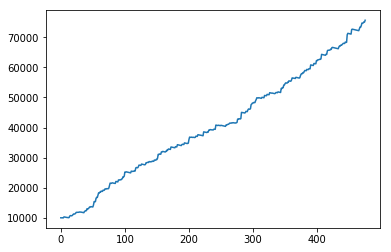

NET PROFIT VALUE IS: 65761.66


In [43]:
#Seperating into target and test set
plt.plot(a)
plt.show()


print('NET PROFIT VALUE IS:',(a[-1]-a[0]))
#print(int(df['close']['2018-12-31'])-int(df['close']['2018-03-15']))

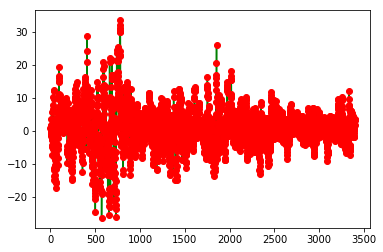

In [44]:
#Normalizing the data
plt.plot(list(X['ROC']), 'g')

plt.plot(list(X['ROC']),'ro')
#plt.plot(list(X['close']))



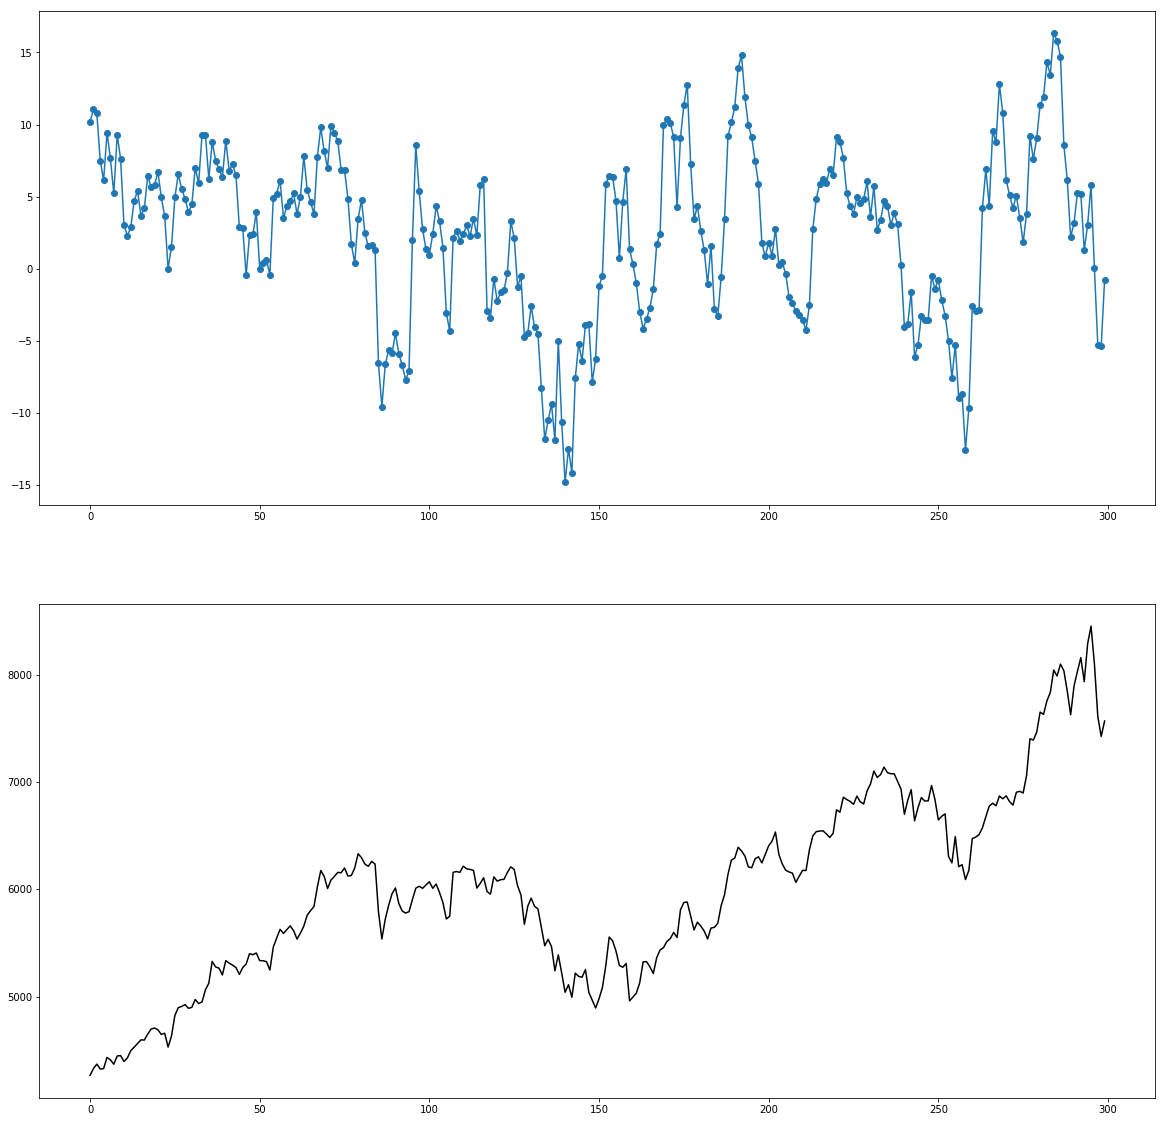

In [45]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.plot(list(X['ROC'][100:400]), color='tab:blue', marker='o')

plt.subplot(212)
plt.plot(list(X['close'][100:400]), color='black')

#plt.plot(t2, np.cos(2*np.pi*t2), color='tab:orange', linestyle='--')
plt.show()


3398
No of trades: 142


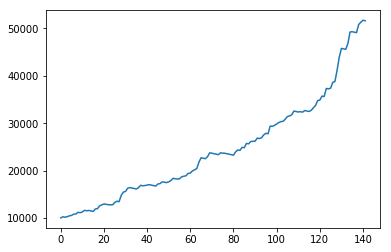

NET PROFIT IS: 41613.28000000001


In [46]:
p=10000
buy=0
sell=0
enter=0
a=[]
pnl=[]
#df=df.reset_index()
print(len(X))
for i in range (1,len(X)):
    if ((X['ROC'][i-1]>0) and (X['ROC'][i-1]<5) and (enter==0)) or ((X['ROC'][i-1]<-15) and (enter==0)):
        buy=X['close'][i]
        enter=1
    if  ((X['ROC'][i-1]>5) and (X['ROC'][i-1]<10) and (enter==1)):
        sell=X['close'][i]
        enter=0
        profit=sell-buy
        if profit<-100:
            profit=-100
        pnl.append(profit)
        p=p+profit
        a.append(p)
print('No of trades:',len(a))

plt.plot(a)
plt.show()


print('NET PROFIT IS:',(a[-1]-a[0]))


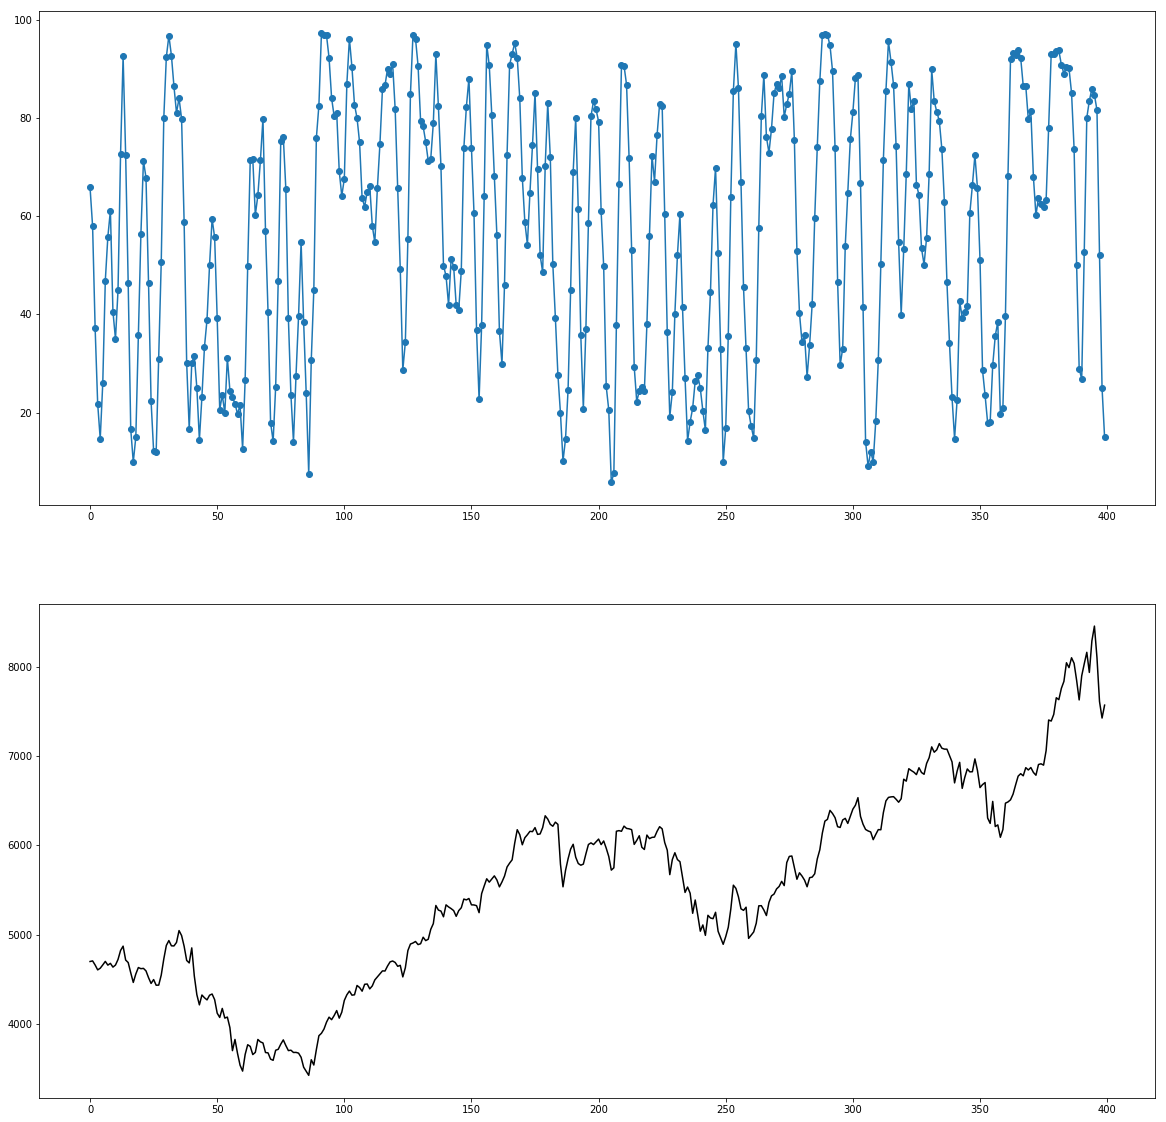

In [47]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.plot(list(X['slowk'][0:400]), color='tab:blue', marker='o')

plt.subplot(212)
plt.plot(list(X['close'][0:400]), color='black')

#plt.plot(t2, np.cos(2*np.pi*t2), color='tab:orange', linestyle='--')
plt.show()

3398
No of trades: 201


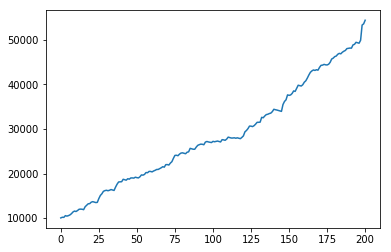

NET PROFIT IS: 44381.759999999995


In [48]:
p=10000
buy=0
sell=0
enter=0
a=[]
pnl=[]
#df=df.reset_index()
print(len(X))
for i in range (1,len(X)):
    if ((X['slowk'][i-1]>20) and (X['slowk'][i-1]<40) and (enter==0)):
        buy=X['close'][i]
        enter=1
    if  ((X['slowk'][i-1]>60) and (X['slowk'][i-1]<100) and (enter==1)):
        sell=X['close'][i]
        enter=0
        profit=sell-buy
        if profit<-100:
            profit=-100
        pnl.append(profit)
        p=p+profit
        a.append(p)
print('No of trades:',len(a))

plt.plot(a)
plt.show()



print('NET PROFIT IS:',(a[-1]-a[0]))


3398
No of trades: 407


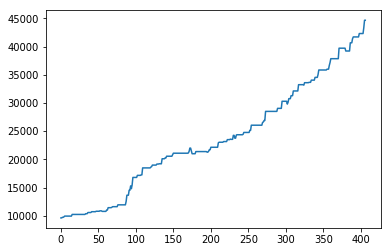

NET PROFIT IS: 35035.27000000002


In [49]:
#RSI_55
p=10000
buy=0
sell=0
enter=0
a=[]
pnl=[]
#df=df.reset_index()
print(len(X))
for i in range (1,len(X)):
    if ((X['RSI'][i]>55) and (X['ROC'][i-1]<70) and (enter==0)):
        buy=X['close'][i]
        enter=1
    if  ((X['RSI'][i]>70) and (enter==1)):
        sell=X['close'][i]
        enter=0
        profit=sell-buy
        if profit<-500:
            profit=-500
        pnl.append(profit)
        p=p+profit
        a.append(p)
print('No of trades:',len(a))

plt.plot(a)
plt.show()


print('NET PROFIT IS:',(a[-1]-a[0]))


In [50]:
#RSI variations
p=10000
buy=0
sell=0
enter=0
a=[]
pnl=[]
#df=df.reset_index()
print(len(X))
fp=0
op=[]
no=[]
kl=[]
jl=[]
for j in range(100):
    a=[]
    p=10000
    for i in range (1,len(X)):
        if ((X['RSI'][i]>j) and (X['RSI'][i-1]<100-j) and (enter==0)):
            buy=X['close'][i]
            enter=1
        if  ((X['RSI'][i]>100-j) and (enter==1)):
            sell=X['close'][i]
            enter=0
            profit=sell-buy
            if profit<-500:
                profit=-500
            pnl.append(profit)
            p=p+profit
            a.append(p)
    if len(a)>2:    
        fp=a[-1]-a[0]

#print('No of trades:',len(a))

    jl.append(j)
    op.append(fp)
    no.append(len(a))



3398


In [51]:
max(op)
#op.index(max(op))

33682.519999999975

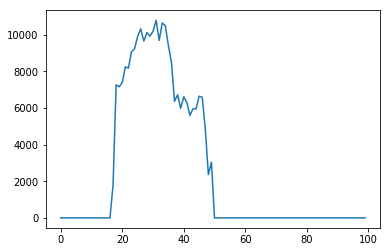

In [32]:
#Feature Importance
plt.plot(op)

In [21]:
df1


,Actual,Predicted
datetime,,
2006-01-09,3413.90,3412.604031
2006-01-12,3954.50,3955.457241
2006-02-05,3557.60,3552.691151
2006-03-05,3605.45,3602.503690
2006-03-10,3588.40,3583.595530
...,...,...
2019-11-25,11914.40,11919.759977
2019-12-04,11596.70,11589.407991
2019-12-09,11035.70,11041.708448
